**Author:** Deepa Anjanamurthy

**Project**: Exchange Explorer (Capstone - Data Science)

### **Table of Contents**

- [**Introduction**](#intro)

- [**Part 1: Data Cleaning and EDA**](#part-1)
    * [**1.1**](#part-1-1)
    * [**1.2**](#part-1-2)
        
- [**Part 2**](#part-2)
    * [**2.1**](#part-2-1)
    * [**2.2**](#part-2-2)
    
- [**Part 3**](#part-3)
    * [**3.1**](#part-3-1) 
    * [**3.2**](#part-3-2)

- [**Part 4**](#part-4)
    * [**4.1**](#part-4-1) 
    * [**4.2**](#part-4-2)

- [**Part 5**](#part-5)
    * [**5.1**](#part-5-1) 
    * [**5.2**](#part-5-2)


<a class="anchor" id="intro"></a>
**Introduction to Exchange Explorer!**

In this project, **"Exchange Explorer: Predictive Analytics for USD Fluctuations,"** we dive into the fascinating world of currency exchange rates, focusing on the US Dollar (USD) — a key player in global finance. The USD's influence stretches far and wide, affecting everything from international trade to personal investment decisions. Our goal is to sift through historical exchange rate data, uncover patterns, and predict future movements using the machine learning techniques. 

This isn't just about crunching numbers; it's about providing valuable insights for investors, financial analysts, and policymakers to make informed decisions in a complex market. Through a careful blend of analysis and technology, "Exchange Explorer" aims to shed light on the dynamics of forex markets, making them more understandable and navigable for everyone involved.



In [2]:
# Import necessary libraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

<a class="anchor" id="part-1"></a>
**Part 1: Data Cleaning and EDA**

The dataset contains 15 years of data separated by the year - **2008 to 2023**. The data spans from Aug 2008 to July 2023. These separate files have been combined into one csv file  for ease and is being used for analysis.

In [3]:
# Load the data
df = pd.read_csv('combined_usd_exchange_rates.csv')

In [4]:
# Check if the dataframe data
df.head()

,Ticker,Date,Open,High,Low,Close,Adj Close,Volume
0,GBP=X,2008-08-01,0.50441,0.5068,0.50396,0.50651,0.50651,0.0
1,AUD=X,2008-08-01,1.06430,1.0765,1.06390,1.07270,1.07270,0.0
2,CAD=X,2008-08-01,1.02340,1.0294,1.02290,1.02460,1.02460,0.0
3,CHF=X,2008-08-01,1.04800,1.0512,1.04640,1.05040,1.05040,0.0
4,CNY=X,2008-08-01,6.83600,6.8554,6.82100,6.84700,6.84700,0.0


In [6]:
# Check the shape - no. of rows and columns in the dataframe
df.shape

(38982, 8)

The dataset contains **38982 rows and 8 columns**. Each row in the dataset represents a single day and includes the following columns:

- Ticker: The currency pair being represented. For e.g.: 'GBP=X' represents the ticker symbol of **USD to GBP** rate. There are **10** such pairs represented in the dataset.
- Date: The date in YYYY-MM-DD format.
- Open: The opening exchange rate of the day.
- High: The highest exchange rate of the day.
- Low: The lowest exchange rate of the day.
- Close: The closing exchange rate of the day.
- Adj Close: The adjusted closing exchange rate of the day.
- Volume: The volume of the currency traded on that day.

In [5]:
# Get a sample of rows in the DF
df.sample(15)

,Ticker,Date,Open,High,Low,Close,Adj Close,Volume
1833,JPY=X,2009-04-24,97.922997,97.929001,96.640999,97.209999,97.209999,0.0
30381,SGD=X,2020-04-10,1.416090,1.417240,1.411700,1.416810,1.416810,0.0
26807,AUD=X,2018-11-27,1.384100,1.387900,1.375600,1.384370,1.384370,0.0
17101,HKD=X,2015-03-05,7.754550,7.756360,7.754550,7.754550,7.754550,0.0
26655,EUR=X,2018-11-06,0.876530,0.877710,0.874270,0.876200,0.876200,0.0
14612,SGD=X,2014-03-21,1.277070,1.277890,1.273370,1.277160,1.277160,0.0
18906,GBP=X,2015-11-13,0.656500,0.658240,0.655200,0.656400,0.656400,0.0
27922,SGD=X,2019-05-01,1.359930,1.360350,1.357900,1.359700,1.359700,0.0
37011,SGD=X,2022-10-26,1.416760,1.418720,1.403860,1.416760,1.416760,0.0
25972,SGD=X,2018-08-01,1.361710,1.362720,1.360500,1.361400,1.361400,0.0


In [6]:
# Check the datatypes of columns and any missing values in the data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 38982 entries, 0 to 38981
Data columns (total 8 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Ticker     38982 non-null  object 
 1   Date       38982 non-null  object 
 2   Open       38982 non-null  float64
 3   High       38982 non-null  float64
 4   Low        38982 non-null  float64
 5   Close      38982 non-null  float64
 6   Adj Close  38982 non-null  float64
 7   Volume     38982 non-null  float64
dtypes: float64(6), object(2)
memory usage: 2.4+ MB


In [7]:
# Check for missing values in each column
missing_values = df.isna().sum()

# Display the count of missing values for each column
print(missing_values)

Ticker       0
Date         0
Open         0
High         0
Low          0
Close        0
Adj Close    0
Volume       0
dtype: int64


On inspecting the columns datatypes, Ticker and Date are object datatypes and the rest columns are float datatypes.

The column Date is currently an object type. In order to use the column in a time series analysis, converting this column to **datetime** data type would be necessary.

In [8]:
df['Date'] = pd.to_datetime(df['Date'])

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 38982 entries, 0 to 38981
Data columns (total 8 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   Ticker     38982 non-null  object        
 1   Date       38982 non-null  datetime64[ns]
 2   Open       38982 non-null  float64       
 3   High       38982 non-null  float64       
 4   Low        38982 non-null  float64       
 5   Close      38982 non-null  float64       
 6   Adj Close  38982 non-null  float64       
 7   Volume     38982 non-null  float64       
dtypes: datetime64[ns](1), float64(6), object(1)
memory usage: 2.4+ MB


In [10]:
# Check unique values in the 'Volume' column
unique_volume_values = df['Volume'].unique()

# Display the unique values
print(unique_volume_values)

[0.]


In [11]:
# Drop the 'Volume' column if it's not needed
df = df.drop('Volume', axis=1)

The Volume column only has the unique value of 0, and provides no value to the analysis. Hence, this column is unnecessary as there's no variability that can be observed using this variable. Dropped this column for future analysis.

Plotting the frequency histograms

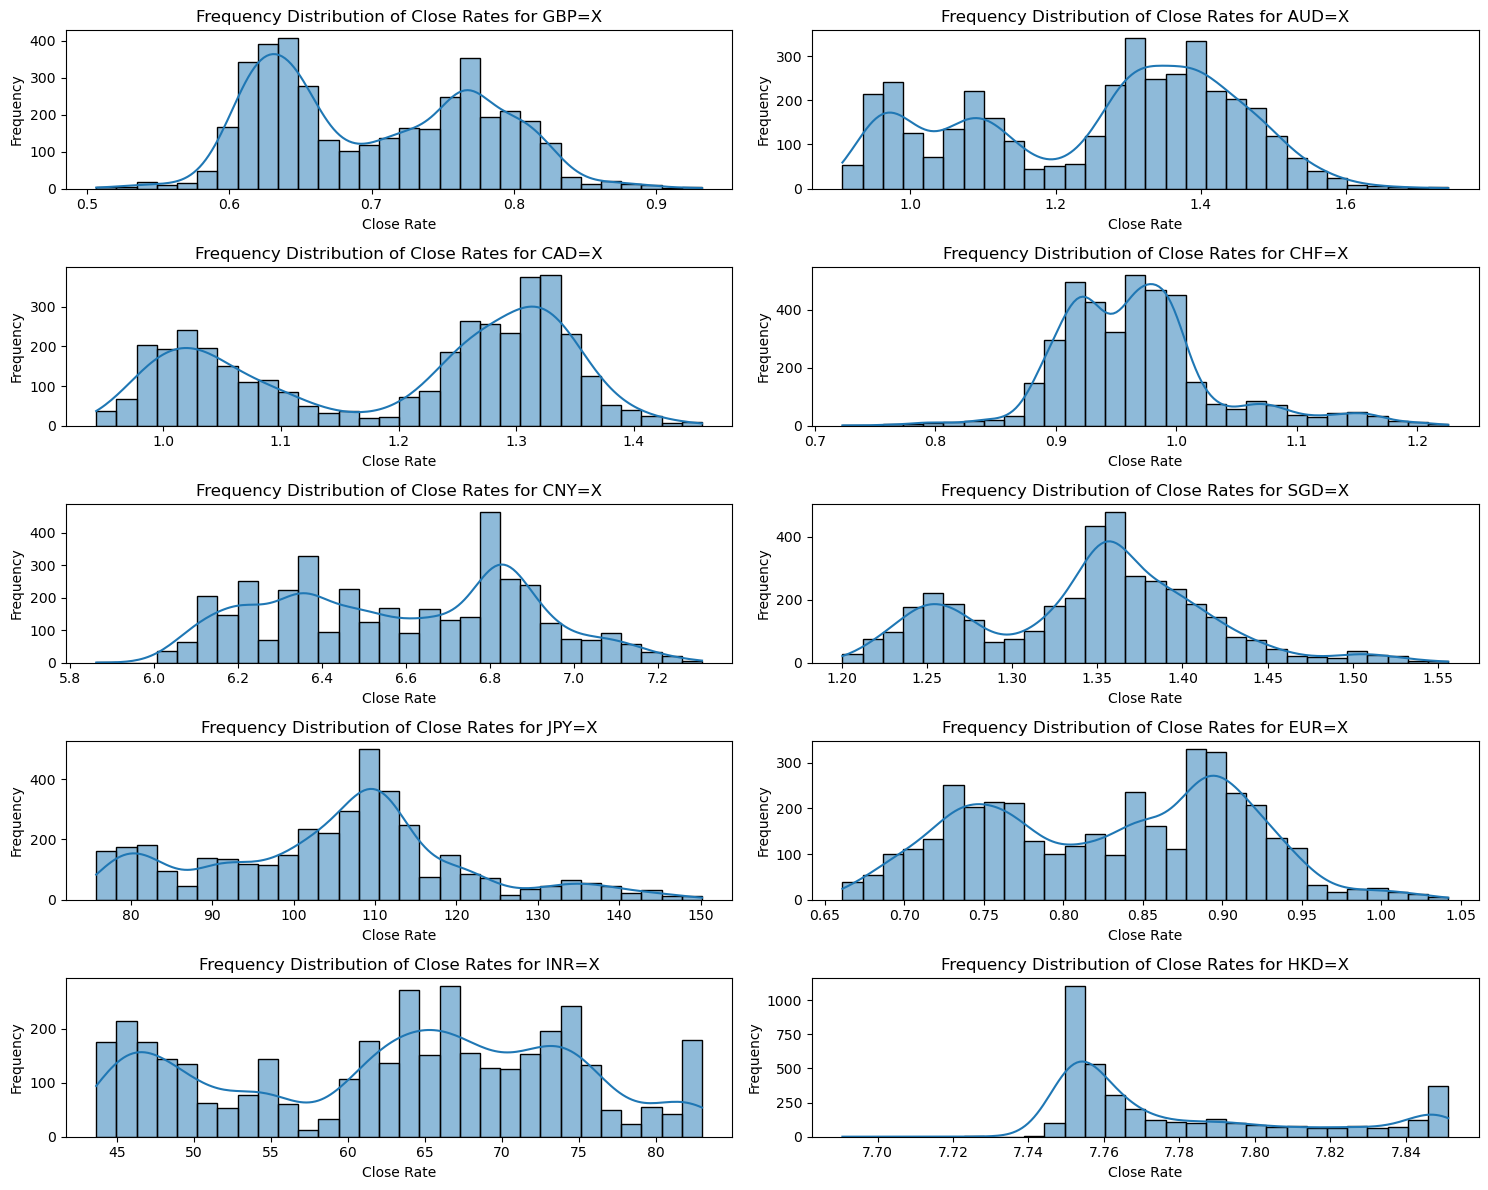

In [12]:
# Unique currency tickers
tickers = df['Ticker'].unique()

# Set up the matplotlib figure
plt.figure(figsize=(15, 12))

# Number of rows for subplot, adjust based on the number of tickers
n_rows = len(tickers) // 2 + len(tickers) % 2

for i, ticker in enumerate(tickers, 1):
    # Filter the DataFrame for each ticker
    ticker_data = df[df['Ticker'] == ticker]
    
    # Create a subplot for each ticker
    plt.subplot(n_rows, 2, i)
    sns.histplot(ticker_data['Close'], kde=True, bins=30)
    plt.title(f'Frequency Distribution of Close Rates for {ticker}')
    plt.xlabel('Close Rate')
    plt.ylabel('Frequency')

plt.tight_layout()
plt.show()

Exploring measures of central tendency (**mean**) of the variables

In [19]:
# Group the data by 'Ticker' and calculate mean for each currency pair
central_tendency_by_ticker = df.groupby('Ticker').agg({
#     'Open': ['mean', 'median', lambda x: x.mode().iloc[0]],
    'Open': ['mean'],
    'Close': ['mean'],
    'Adj Close': ['mean'],
    'High': ['mean'],
    'Low': ['mean']  
    
})

# Display the mean for each currency pair
central_tendency_by_ticker

,Open,Close,Adj Close,High,Low
,mean,mean,mean,mean,mean
Ticker,,,,,
AUD=X,1.257908,1.258001,1.258001,1.264428,1.251644
CAD=X,1.198423,1.198412,1.198412,1.202731,1.194271
CHF=X,0.967206,0.967181,0.967181,0.970989,0.963413
CNY=X,6.587017,6.587329,6.587329,6.596036,6.576680
EUR=X,0.828949,0.828978,0.828978,0.832197,0.825921
GBP=X,0.702123,0.702135,0.702135,0.705247,0.699425
HKD=X,7.780899,7.780890,7.780890,7.782881,7.778799
INR=X,62.942183,62.946545,62.946545,63.170480,62.734809
